In [4]:
import pandas as pd

# 데이터 불러오기 및 탐색적 데이터 분석

## 데이터 불러오기

In [6]:
# 판다스의 nrows 속성을 이용해 5,500만 row 중 50만 row만 가져오기 
df = pd.read_csv('train.csv', parse_dates=['pickup_datetime'], nrows=500000)

In [10]:
# pd.set_option('expand_frame_repr', False)

print(df.head())   # 5줄 출력해보기
print(df.shape)    # df의 (행, 열) 크기를 출력

                             key  fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00        -73.844311        40.721319         -73.841610         40.712278                1
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00        -74.016048        40.711303         -73.979268         40.782004                1
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00        -73.982738        40.761270         -73.991242         40.750562                2
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00        -73.987130        40.733143         -73.991567         40.758092                1
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00        -73.968095        40.768008         -73.956655         40.783762                1
(500000, 8)


## 위치 데이터 시각화

In [12]:
# 뉴욕시의 경도 범위
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# 뉴욕시의 위도 범위
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep=True)    # df 복제본 만들기

for long in ['pickup_longitude', 'dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] < nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < nyc_max_latitude)]
    
print(df2.shape)    # df2의 (행, 열) 크기를 출력

(483500, 8)


In [22]:
# 위도, 경도를 이용해 점 차트를 그리는 함수 정의
def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # 차트 크기를 설정한다
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize=15, alpha=1, color='r') # 랜드마크를 지도 위에 표시한다
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.005), color='r', backgroundcolor='w') # add 0.005 offset on landmark name for aesthetics purposes

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

In [23]:
import matplotlib.pyplot as plt

In [24]:
# 뉴욕시의 랜드마크의 위도, 경도
landmarks = {'JFK Airport': (-73.78,40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

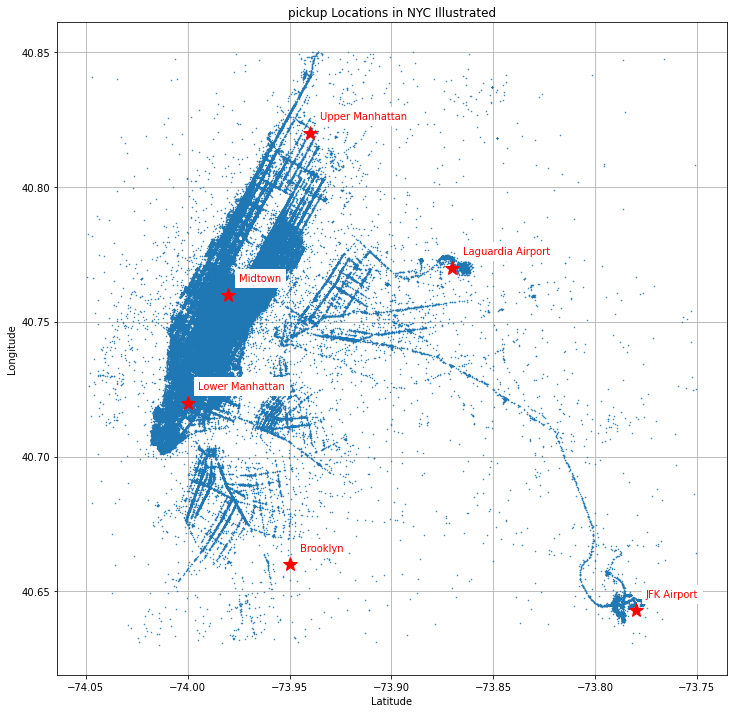

In [27]:
# 승차 위치 표시
plot_lat_long(df2, landmarks, points='pickup')

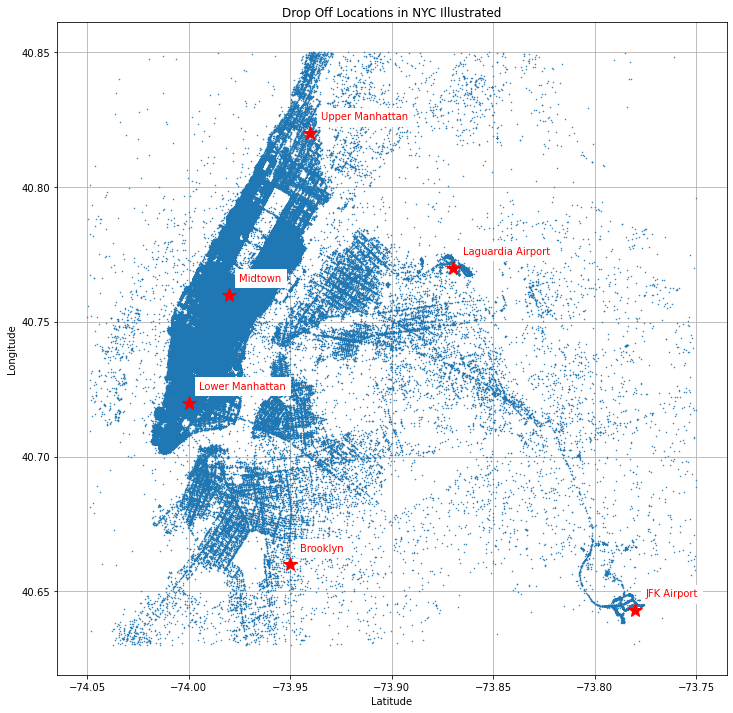

In [26]:
# 하차 위치 표시
plot_lat_long(df2, landmarks, points='drop Off')

## 요일 및 시간별 승차 통계

In [29]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

In [30]:
import numpy as np

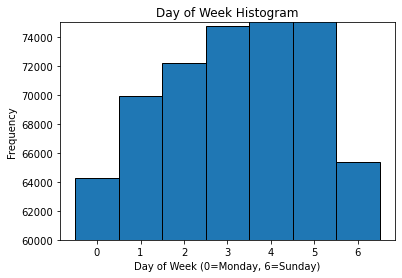

In [31]:
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

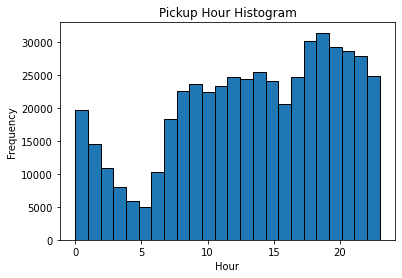

In [32]:
df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

# 데이터 전처리

## 결측치 및 이상치 처리

In [33]:
## 결측값 및 데이터 이상치 처리
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [35]:
# 결측치 제거
df = df.dropna()
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [60]:
# 이상치 확인
print(df.loc[:,['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].describe())

         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count
count  499760.000000     499760.000000    499760.000000      499760.000000     499760.000000    499760.000000
mean       11.300049        -72.522405        39.921591         -72.525784         39.918307         1.687164
std         9.400215         11.850322         8.071247          11.788054          7.386892         1.304277
min         0.000000      -2986.242495     -3116.285383       -3383.296608      -2559.748913         1.000000
25%         6.000000        -73.992049        40.734926         -73.991380         40.734062         1.000000
50%         8.500000        -73.981788        40.752674         -73.980128         40.753152         1.000000
75%        12.500000        -73.967133        40.767072         -73.963587         40.768125         2.000000
max       100.000000       2140.601160      1703.092772          40.851027        404.616667         6.000000


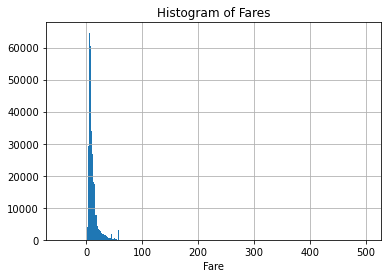

In [43]:
# 히스토그램으로 요금 분포 살펴보기
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

In [44]:
# 0달러보다 적거나 100달러보다 큰 요금을 가진 로우는 제거
df = df[(df['fare_amount'] >=0) & (df['fare_amount'] <= 100)]

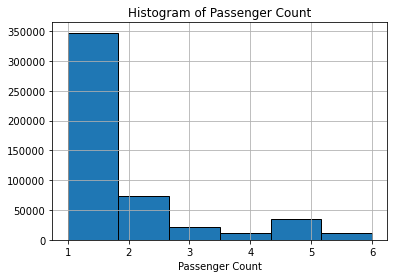

In [52]:
# 승객 이상치 확인
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [59]:
# 승객 숫자가 0인 값을 최빈값인 1로 대체한다.
# df.loc[(df['passenger_count'] == 0), 'passenger_count']=1
df.loc[df['passenger_count']==0,:]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour


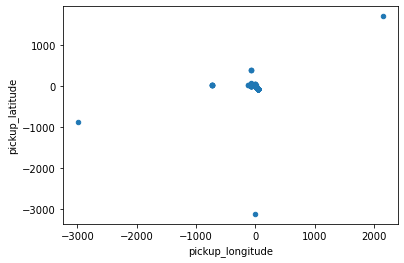

In [61]:
df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()